In [1]:
pwd

'C:\\Users\\voanh'

In [2]:
import tensorflow as tf

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

Using TensorFlow backend.


In [4]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#------------------------------
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
#------------------------------

In [7]:
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 5
#------------------------------

In [8]:
with open("E:/FER2013/fer2013.csv") as f:
    content = f.readlines()


In [9]:
lines = np.array(content)

In [10]:
print(lines)

['0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98

In [11]:
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35887
instance length:  2304


In [12]:
#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------

In [13]:
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

#------------------------------

In [14]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

In [15]:
x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255


In [16]:
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

In [17]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#------------------------------

28708 train samples
3589 test samples


In [22]:
#construct CNN structure
model = Sequential()

In [23]:
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

In [24]:
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

In [25]:
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

In [26]:
model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

In [27]:
model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

In [28]:
model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------

In [29]:
fit = False

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('E:/FER2013/weights.h5') #load weights

In [28]:
model.save_weights("E:/FER2013/weights.h5")

In [30]:
#------------------------------
"""
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
"""
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
#------------------------------

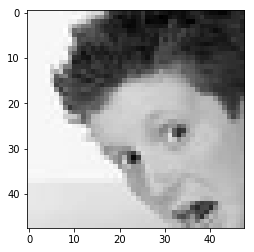

[0.21068615 0.00616698 0.27357933 0.10203457 0.17506202 0.16126768
 0.07120325]


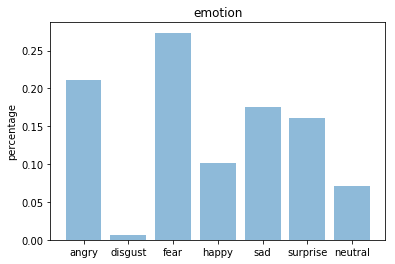

----------------------------------------------


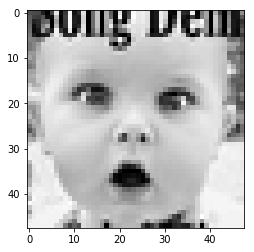

[0.04054555 0.0039359  0.07989366 0.0159032  0.00509767 0.8509011
 0.00372289]


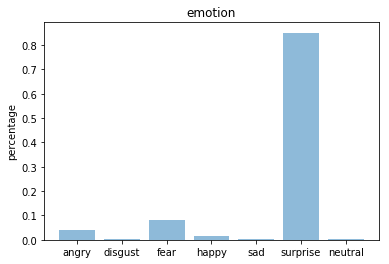

----------------------------------------------


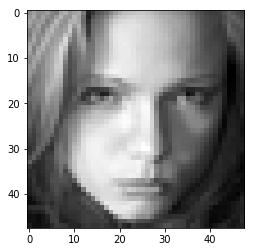

[0.14391817 0.01703651 0.11834823 0.14549753 0.31616732 0.00681562
 0.25221664]


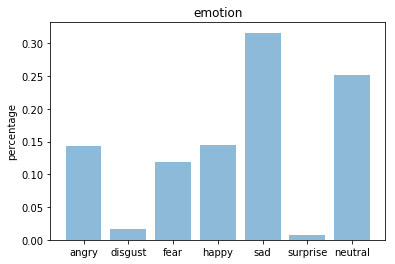

----------------------------------------------


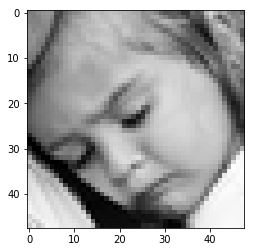

[0.0476268  0.00132529 0.21088006 0.01753983 0.5540339  0.02177486
 0.14681926]


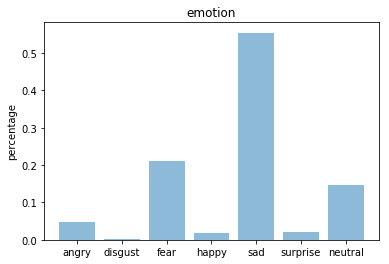

----------------------------------------------


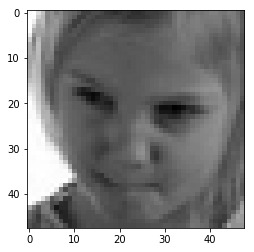

[0.37483397 0.04181485 0.12616067 0.06268077 0.2741838  0.00601656
 0.11430939]


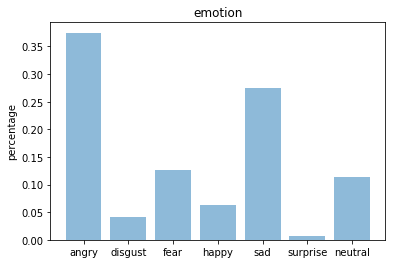

----------------------------------------------


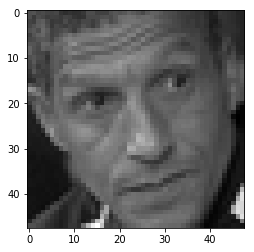

[0.09422613 0.002546   0.10063362 0.0187575  0.20105822 0.01460812
 0.56817037]


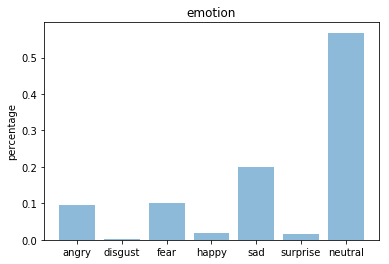

----------------------------------------------


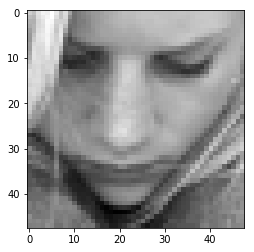

[0.05895287 0.01314933 0.17505582 0.05876449 0.6085911  0.00330337
 0.08218303]


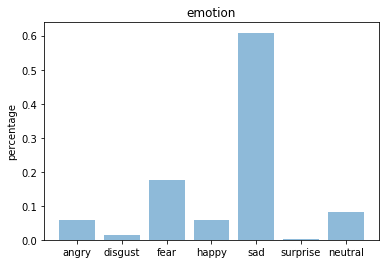

----------------------------------------------


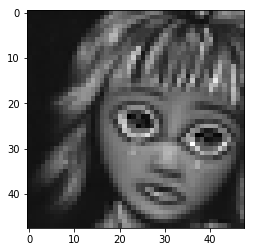

[0.0754489  0.00241626 0.13364509 0.28163132 0.28973266 0.03623378
 0.18089196]


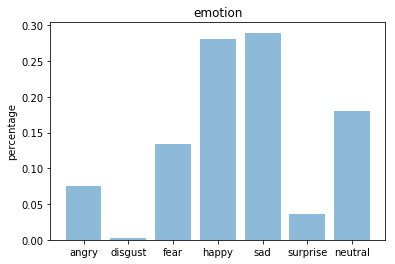

----------------------------------------------


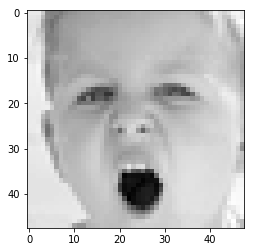

[0.78439325 0.00764601 0.1310109  0.00880303 0.00985382 0.05689001
 0.00140297]


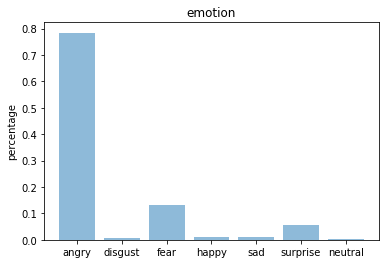

----------------------------------------------


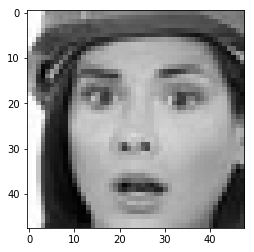

[6.1805593e-03 3.4486712e-04 2.1904695e-01 1.1968235e-02 8.6615244e-03
 7.4745101e-01 6.3468865e-03]


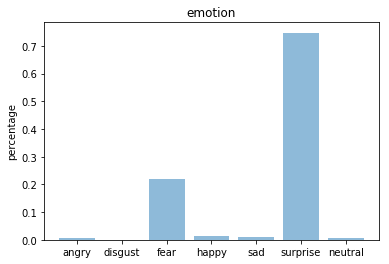

----------------------------------------------


In [31]:

monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

#------------------------------
#make prediction for custom image out of test set

In [34]:
import numpy as np
import cv2
from keras.preprocessing import image

In [32]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 1.1242277171596173
Train accuracy: 57.370767730249405
Test loss: 1.218308902311604
Test accuracy: 53.413207024775964


In [35]:
# path is link to haarcascade filter.
face_cascade = cv2.CascadeClassifier('E:/FER2013/haarcascade_frontalface_default.xml') 


cap = cv2.VideoCapture(0)
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
while(True):
	ret, img = cap.read()
	img = cv2.flip(img, 1)
	gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	faces = face_cascade.detectMultiScale(gray, 1.3, 5)

	#print(faces) #locations of detected faces


	for (x,y,w,h) in faces:
		cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
		
		detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
		detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
		detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48
		
		img_pixels = image.img_to_array(detected_face)
		img_pixels = np.expand_dims(img_pixels, axis = 0)
		
		img_pixels /= 255 #pixels are in scale of [0, 255]. normalize all pixels in scale of [0, 1]
		
		predictions = model.predict(img_pixels) #store probabilities of 7 expressions
		
		#find max indexed array 0: angry, 1:disgust, 2:fear, 3:happy, 4:sad, 5:surprise, 6:neutral
		max_index = np.argmax(predictions[0])
		
		emotion = emotions[max_index]
		
		#write emotion text above rectangle
		cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
		
		#process on detected face end
		#-------------------------

	cv2.imshow('img',img)

	if cv2.waitKey(1) & 0xFF == ord('q'): #press q to quit
		break

#kill open cv things		
cap.release()
cv2.destroyAllWindows()